Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [20]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [2]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [ ]:
# Load images and labels
augmented_images = np.load('/content/drive/My Drive/FYP/dataset/augmented_images.npy')
augmented_labels = np.load('/content/drive/My Drive/FYP/dataset/augmented_labels.npy')

## [3.2] Jupyter

In [3]:
# Load images and labels
augmented_images = np.load('dataset/augmented_images.npy')
augmented_labels = np.load('dataset/augmented_labels.npy')

# [4] Prepare Dataset

In [4]:
augmented_images = resize_images(augmented_images, (299,299))

In [5]:
# Display array shapes
display_array_shapes(augmented_images, augmented_labels)

+--------------+---------------------+
| Array Name   | Shape               |
+==============+=====================+
| Images       | (1211, 299, 299, 3) |
+--------------+---------------------+
| Labels       | (1211,)             |
+--------------+---------------------+


In [6]:
# Get the number of unique labels
num_classes = len(np.unique(augmented_labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [7]:
# Binarize labels
augmented_labels_binarized = binarize_labels(augmented_labels)

# [5] Train Model

In [8]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(augmented_images, augmented_labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (968, 299, 299, 3) (968, 9)
Validation shape: (121, 299, 299, 3) (121, 9)
Test shape: (122, 299, 299, 3) (122, 9)


In [9]:
# Build and compile InceptionV3 model
inceptionv3_model = build_and_compile_inceptionv3_model(num_classes)

2024-04-02 16:48:00.636082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 16:48:00.636199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 16:48:00.636959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Train the model
inceptionv3_history = inceptionv3_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(X_val, y_val)

Epoch 1/10
24/24 [==============================] - 30s 1s/step - loss: 11.8752 - accuracy: 0.4669 - val_loss: 9.1404 - val_accuracy: 0.5124
Epoch 2/10
24/24 [==============================] - 23s 943ms/step - loss: 1.6767 - accuracy: 0.8523 - val_loss: 3.5351 - val_accuracy: 0.7273
Epoch 3/10
24/24 [==============================] - 22s 915ms/step - loss: 0.3806 - accuracy: 0.9473 - val_loss: 3.1161 - val_accuracy: 0.7686
Epoch 4/10
24/24 [==============================] - 23s 959ms/step - loss: 1.4032 - accuracy: 0.9019 - val_loss: 5.6179 - val_accuracy: 0.7355
Epoch 5/10
24/24 [==============================] - 23s 965ms/step - loss: 0.2426 - accuracy: 0.9752 - val_loss: 6.1025 - val_accuracy: 0.7521
Epoch 6/10
24/24 [==============================] - 26s 1s/step - loss: 0.0605 - accuracy: 0.9876 - val_loss: 5.7675 - val_accuracy: 0.7190
Epoch 7/10
24/24 [==============================] - 36s 2s/step - loss: 0.0653 - accuracy: 0.9917 - val_loss: 5.3957 - val_accuracy: 0.7438
Epoch 8

In [11]:
# Calculate average loss and accuracy
average_loss = sum(inceptionv3_history.history['val_loss']) / len(inceptionv3_history.history['val_loss'])
average_accuracy = sum(inceptionv3_history.history['val_accuracy']) / len(inceptionv3_history.history['val_accuracy'])

print(f"Average Validation Loss: {average_loss}, Average Validation Accuracy: {average_accuracy}")

Average Validation Loss: 5.43062903881073, Average Validation Accuracy: 0.7206611633300781


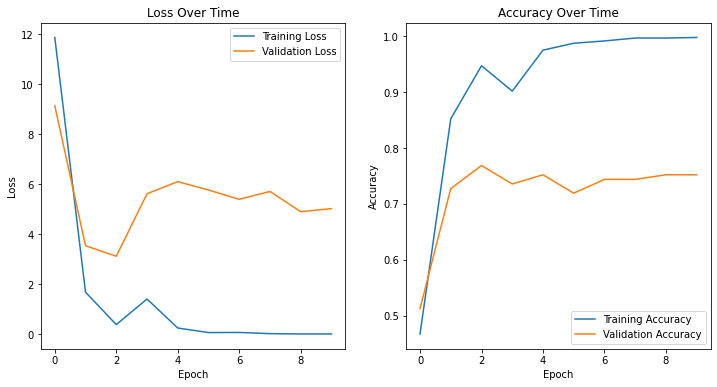

In [12]:
plot_training_history(inceptionv3_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save model
inceptionv3_model.save('/content/drive/MyDrive/FYP/models/InceptionV3_augment')

## [6.2] Jupyter

In [13]:
# Save model
inceptionv3_model.save('models/InceptionV3_augment')

INFO:tensorflow:Assets written to: models/InceptionV3_augment/assets


INFO:tensorflow:Assets written to: models/InceptionV3_augment/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/InceptionV3_augment')

## [6.2] Jupyter

In [14]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('models/InceptionV3_augment')

# [7] Test and Analyse

In [15]:
# Evaluate the model on the test data
inceptionv3_test_loss, inceptionv3_test_accuracy = loaded_inceptionv3_model.evaluate(X_test, y_test)
print(f"Test Loss: {inceptionv3_test_loss}, Test Accuracy: {inceptionv3_test_accuracy}")

4/4 [==============================] - 6s 812ms/step - loss: 4.5205 - accuracy: 0.7459
Test Loss: 4.520513534545898, Test Accuracy: 0.7459016442298889


In [16]:
inceptionv3_predicted_labels, inceptionv3_true_labels_list = make_predictions_and_evaluate(loaded_inceptionv3_model, X_test, y_test)

4/4 [==============================] - 5s 827ms/step


In [21]:
calculate_classification_metrics(inceptionv3_true_labels_list, inceptionv3_predicted_labels)

Accuracy: 0.7459
Precision: 0.7301
Recall: 0.6662
F1 Score: 0.6967


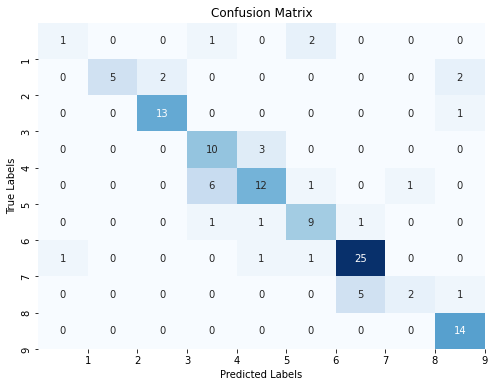

In [18]:
display_confusion_matrix(inceptionv3_true_labels_list, inceptionv3_predicted_labels)